let's use this outline as a tool to track the project as we work through the analysis. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from pathlib import Path

# from google.colab import drive

import os

In [ ]:
# drive.mount('/content/gdrive')
# wine_df = pd.read_csv('gdrive/My Drive/resources/winedata.csv')
# # wine_df = pd.read_csv('gdrive/My Drive/winedata.csv')

In [2]:
winedata_df = pd.read_csv(os.path.join("resources","winedata.csv"))
winedata_df.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


I. Determine the big picture:

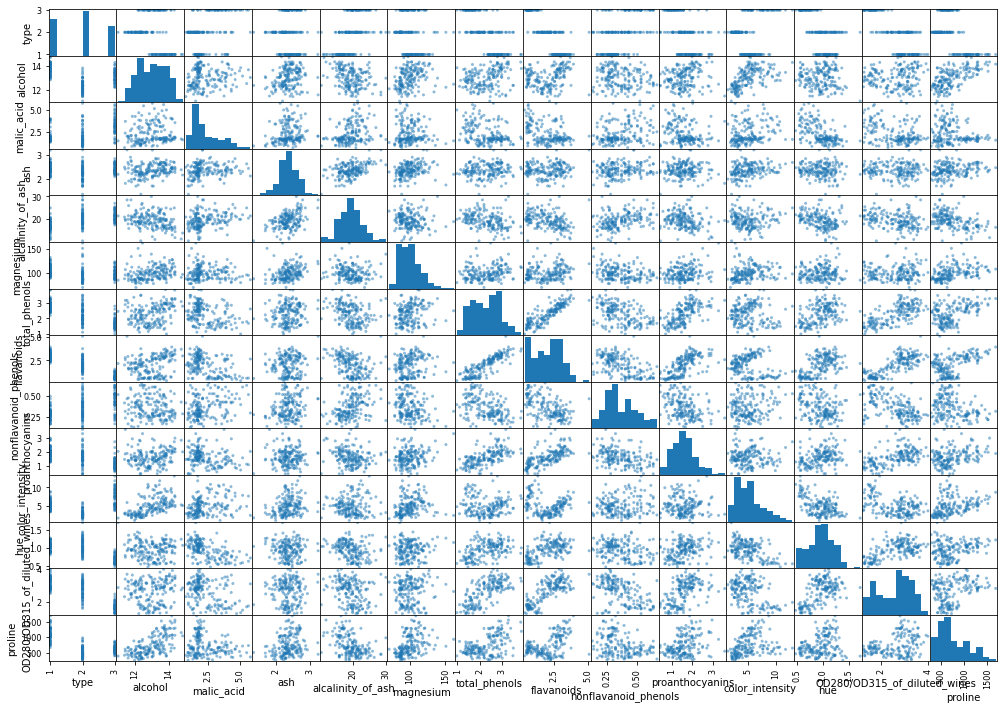

In [4]:
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(winedata_df, figsize=(17,12))
plt.show()

II. Get the Data:

<AxesSubplot:>

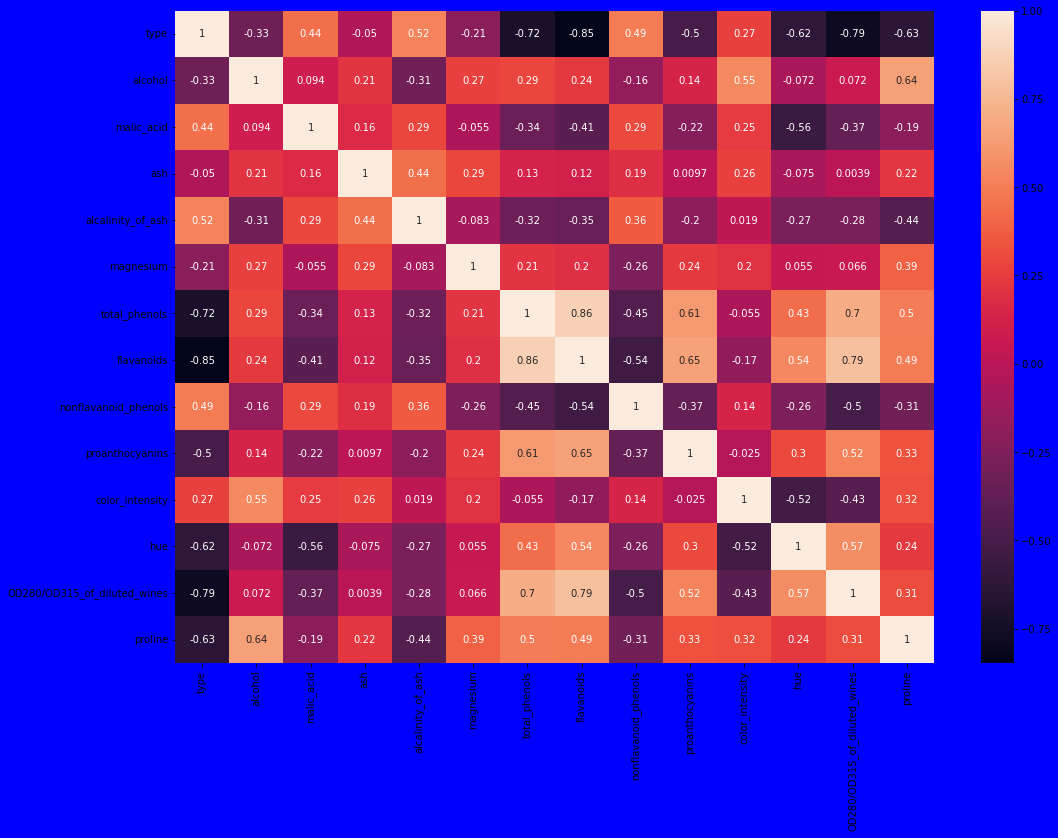

In [5]:
# heatmap, because why not?
plt.figure(figsize=[17,12], facecolor='blue')
sb.heatmap(winedata_df.corr(), annot=True)

In [ ]:
# drop type column - this is what we are trying to discover
# wine_cols=winedata_df.drop(columns=['type'])

In [ ]:
# wine_cols.insert(0, 'class', 'class'=='0')
# print(wine_cols)

In [ ]:
# print(wine_cols)

III. Explore and Visualize Data for Preliminary Analysis:

In [ ]:
# wine_df = wine_cols

In [6]:
wine_df=winedata_df

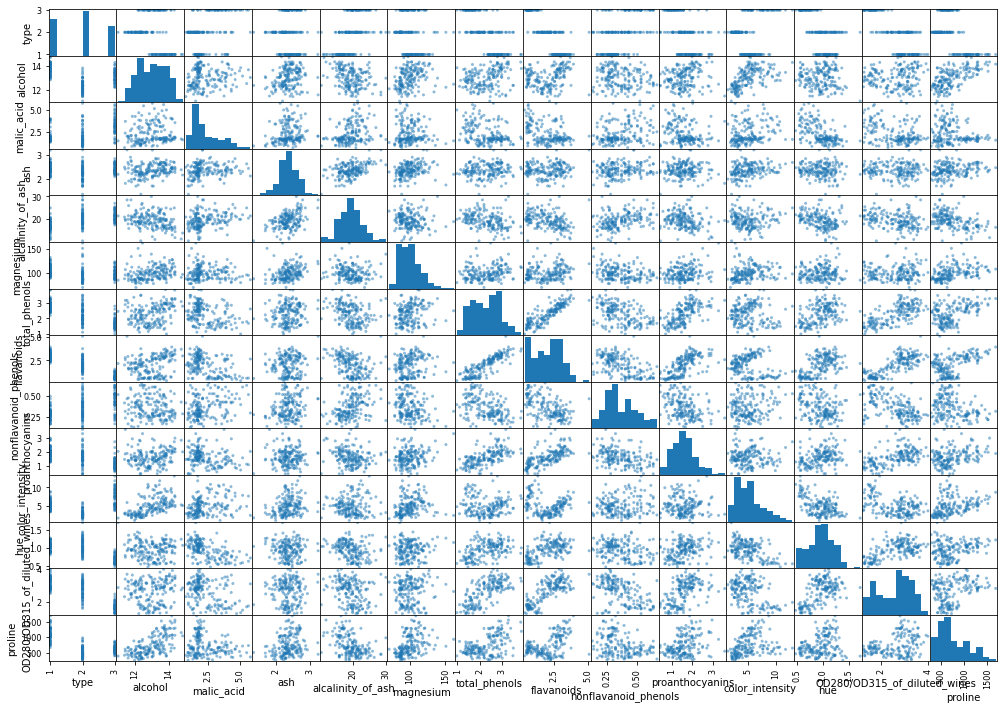

In [7]:
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
# attributes =wine_df["catergories", "alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"])
pd.plotting.scatter_matrix(wine_df, figsize=(17,12))
plt.show()

IV. Prepare Data for Machine Learning:

using the histogram above we can see that the two values with rightward slopes indictating correlation are total_phenols and flavanoids. Since flavanoids seem to have multiple intersections with rightward slopes it is probably the better candidate for y. 

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# # y = winedata_df["type"]
# y = winedata_df["alcohol"]
# # y = winedata_df["malic_acid"]
# y = winedata_df["ash"]
# y = winedata_df["alcaninity_of_ash"]
# y = winedata_df["magnesium"]
# y = winedata_df["total_phenols"]
# y = winedata_df["flavanoids"]
# y = winedata_df["proanthocyanins"]
# y = winedata_df["color_intensity"]
# y = winedata_df["hue"]
# y = winedata_df["OD280/od315_of_diluted_wines"]
# y = winedata_df["proline"]

# print("Shape", X.shape, y.shape)

In [ ]:
# X = winedata_df[["malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["alcohol"]

# # https://www.statology.org/valueerror-unknown-label-type-continuous/

# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)

# print("Shape", X.shape, y.shape)

In [ ]:
# X = winedata_df[["alcohol", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["malic_acid"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["alcaninity_of_ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["magnesium"]


In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["total_phenols"]

In [9]:
X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols","flavanoids", "nonflavanoid_phenols",
            "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
pre_y = winedata_df["type"]

# #label encoder makes y a binary for logistic regression
lab = preprocessing.LabelEncoder()
y= lab.fit_transform(pre_y)

In [ ]:
# #label encoder makes y a binary for logistic regression
lab = preprocessing.LabelEncoder()
y= lab.fit_transform(pre_y)

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["proanthocyanins"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["color_intensity"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["hue"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue","proline"]]
# y = winedata_df["OD280/od315_of_diluted_wines"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines"]]
# y = winedata_df["proline"]

V. Select Model and Train It

In [10]:
from sklearn.model_selection import train_test_split
# https://www.statology.org/valueerror-unknown-label-type-continuous/
# removed y_transformed
# X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state=30)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=30)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier

LogisticRegression()

In [ ]:
# #Both scalers to test A/B
# scaler = StandardScaler(). fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled

In [12]:
#Both scalers to test A/B
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.21315789, 0.42490119, 0.34640523, ..., 0.3902439 , 0.45787546,
        0.15834522],
       [0.32105263, 0.78656126, 0.54901961, ..., 0.2195122 , 0.        ,
        0.31526391],
       [0.15263158, 0.12055336, 0.65359477, ..., 0.3902439 , 0.72893773,
        0.28673324],
       ...,
       [0.70526316, 0.97035573, 0.49019608, ..., 0.1300813 , 0.17216117,
        0.32952924],
       [0.71052632, 0.71541502, 0.36601307, ..., 0.24390244, 0.17582418,
        0.17261056],
       [0.53157895, 0.1798419 , 0.55555556, ..., 0.5203252 , 0.45421245,
        0.58987161]])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.51578947,  0.18379447,  0.58823529,  1.0877193 ,  0.72619048,
         0.8       ,  0.53797468,  0.1509434 ,  0.48895899,  0.17662116,
         0.67479675,  0.81684982,  0.5042796 ],
       [ 0.65      ,  0.21146245,  0.59477124,  0.50292398,  0.21428571,
         0.53448276,  0.47890295,  0.28301887,  0.39432177,  0.19112628,
         0.5203252 ,  0.93406593,  0.40442225],
       [ 0.62368421,  0.76284585,  0.75816993,  0.79532164,  0.4047619 ,
         0.34482759,  0.13080169,  0.26415094,  0.22082019,  0.61604096,
         0.15447154,  0.23809524,  0.2510699 ],
       [ 0.19210526,  0.38339921,  0.79738562,  0.50292398,  0.29761905,
         0.26551724,  0.35654008,  0.88679245,  0.20189274,  0.21501706,
         0.6097561 ,  0.45054945,  0.23466476],
       [ 0.56315789,  0.36561265,  0.4379085 ,  0.50292398,  0.5       ,
         0.23103448,  0.07172996,  0.75471698,  0.33123028,  0.68430034,
         0.09756098,  0.12820513,  0.40085592],
       [ 0.27631579,  0.116600

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [15]:
classifier.fit(X_train, y_train)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# #Coninuous Error occurred, commented out
classifier.fit(X_train, y_train)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

Training Data Score: 0.9647887323943662


In [ ]:
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

K-Nearest Neighbor Analysis

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler().fit(X_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.972
k: 3, Train/Test Score: 0.965/0.972
k: 5, Train/Test Score: 0.979/0.944
k: 7, Train/Test Score: 0.986/0.972
k: 9, Train/Test Score: 0.972/0.972
k: 11, Train/Test Score: 0.972/0.972
k: 13, Train/Test Score: 0.958/0.944
k: 15, Train/Test Score: 0.972/0.972
k: 17, Train/Test Score: 0.965/0.972
k: 19, Train/Test Score: 0.979/0.944


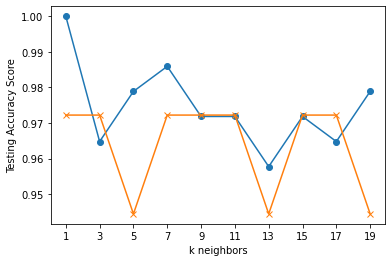

In [20]:
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker = 'x')

loc, labels = plt.xticks()

plt.xticks(np.arange(1, max(loc), step=2))

plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc:%.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc:0.978


In [22]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [35]:
confusion_matrix(y_true, y_pred)

array([[11,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  9]])

In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Random Forest Classifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
clf = RandomForestClassifier(random_state=1, n_estimators=5000). fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9777777777777777


In [38]:
feature_importances = clf.feature_importances_

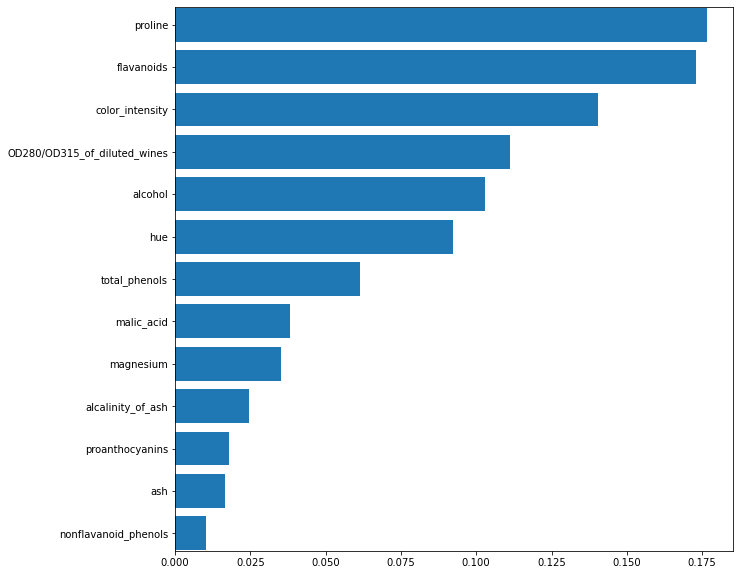

In [28]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [39]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [40]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled= scaler.transform(X_selected_test)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [41]:
clf = LogisticRegression(). fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [42]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9777777777777777


VI. Fine Tune Model

VII.Present Solution

VIII. Launch System